In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("Decision tree classifier Sample_Data.csv")
print(df.head())

    User ID  Gender  Age  Salary  PurchasedTheProduct
0  15624510    Male   19   19000                    0
1  15810944    Male   35   20000                    0
2  15668575  Female   26   43000                    0
3  15603246  Female   27   57000                    0
4  15804002    Male   19   76000                    0


In [ ]:
print(df.isna().count())

User ID                400
Gender                 400
Age                    400
Salary                 400
PurchasedTheProduct    400
dtype: int64


In [ ]:
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

In [ ]:
x = df[["Gender", "Age", "Salary"]]
y = df["PurchasedTheProduct"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train)

     Gender  Age  Salary
3         1   27   57000
18        0   46   28000
202       1   39  134000
250       1   44   39000
274       1   57   26000
..      ...  ...     ...
71        1   24   27000
106       1   26   35000
270       1   43  133000
348       0   39   77000
102       1   32   86000

[320 rows x 3 columns]


In [ ]:
print(x_test)

     Gender  Age  Salary
209       1   46   22000
280       1   59   88000
33        1   28   44000
210       1   48   96000
93        1   29   28000
..      ...  ...     ...
246       1   35   50000
227       0   56  133000
369       1   54   26000
176       1   35   47000
289       1   37   78000

[80 rows x 3 columns]


In [ ]:
print(y_train)

3      0
18     1
202    1
250    0
274    1
      ..
71     0
106    0
270    0
348    0
102    0
Name: PurchasedTheProduct, Length: 320, dtype: int64


In [ ]:
print(y_test)

209    0
280    1
33     0
210    1
93     0
      ..
246    0
227    1
369    1
176    0
289    1
Name: PurchasedTheProduct, Length: 80, dtype: int64


In [ ]:
gini= DecisionTreeClassifier(criterion="gini")
gini.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
ent = DecisionTreeClassifier(criterion="entropy")
ent.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred_gini= gini.predict(x_test)
print(y_pred_gini)

[1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0
 1 0 1 1 0 0]


In [ ]:
y_pred_ent= ent.predict(x_test)
print(y_pred_ent)

[1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0
 1 0 1 1 0 0]


In [ ]:
#Accuracy.
gini_accuracy= accuracy_score(y_test, y_pred_gini)
ent_accuracy= accuracy_score(y_test, y_pred_ent)

In [ ]:
print(f"Gini accurancy = {gini_accuracy*100}%" )
print(f"Entropy accurancy = {ent_accuracy*100}%" )

Gini accurancy = 86.25%
Entropy accurancy = 85.0%


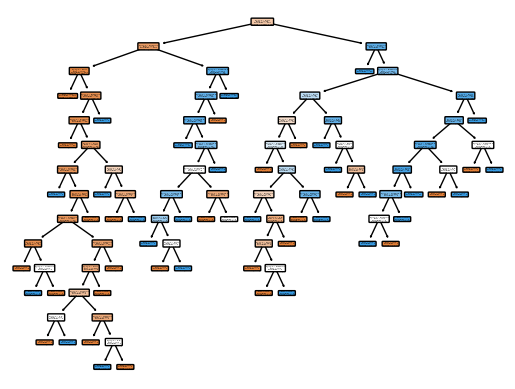

In [ ]:
from sklearn.tree import plot_tree
#Tree (Gini)
plot_tree(gini, filled=True, rounded=True)
plt.show()

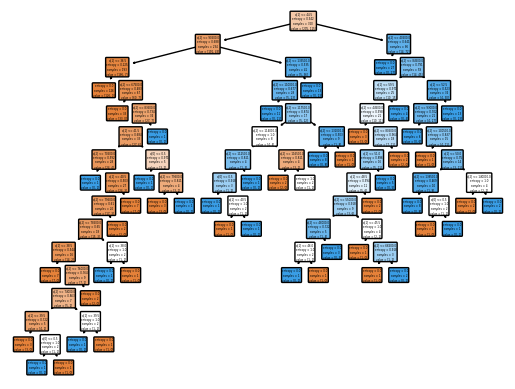

In [ ]:
#Tree (Entropy)
plot_tree(ent, filled=True, rounded=True)
plt.show()